<img src="https://algo-assets.amplifyme.com/quant/millenium/Millenium_Quant_C1.png" width="100%"/>

### **Quant Simulation Challenge 1: Price Making**

In this challenge, your task is to build a simple, automated market maker. Using **object-oriented programming**, you will create a class that can provide a two-sided price quote (a bid and an offer) for any given asset.

Your model will need to calculate quotes that are **2% away** from the current market price.

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>What is Market Making?</h4>
<p>When a large client (like a hedge fund) wants to trade, they ask a Market Maker for a price. </p>
<ul>
    <li>The client tells you <i>what</i> they want to trade (e.g., Apple shares) and <i>how many</i>.</li>
    <li>They don't tell you if they want to <b>buy</b> or <b>sell</b>.</li>
    <li>Because of this, you must provide a price for both scenarios:</li>
    <ul>
        <li><b>Bid Price:</b> The price the client can <b>sell</b> at.</li>
        <li><b>Offer Price:</b> The price the client can <b>buy</b> at.</li>
    </ul>
</ul>
</div>

#### **Calculation Rules**

For this challenge, your bid and offer prices should be calculated using a simple 2% spread around the **reference price** (the current market price).

* **Bid Price** = Reference Price $\times$ (1 - 0.02)
* **Offer Price** = Reference Price $\times$ (1 + 0.02)

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>For Example:</h4>
<p>
If a client requests a quote for Apple and its current reference price is <b>\$100</b>, your market maker would provide the following quote:
</p>
<p style="text-align:center; font-size:1.2em; font-family:monospace;">
<b>Bid: \$98.00 — \$102.00 :Offer</b>
</p>
</div>

Now, let's import the packages you will need for this notebook.

In [263]:
# The code in this cell is used to import the packages to be used throughout this notebook.
# The following are private packages available only during this simulation:
from AmplifyQuantTrading import Data
from AmplifyQuantTrading import Exchange
from AmplifyQuantTrading import MarketMaker
from AmplifyQuantTrading import HedgeFund as hf
# The following are publicly available packages:
from matplotlib import pyplot as plt
from pandas import *

In [264]:
# HIDDEN PARAMS BOX

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Setting Up Our Data</h4>
<p>The code below assigns our data to two main variables that we'll use throughout the project:</p>
<ul>
    <li><code>prices</code>: A series of live market prices for our assets.</li>
    <li><code>price_requests</code>: A series of trade requests from our clients.</li>
</ul>
</div>

In [265]:
prices = Data.get_price_series("PricestoFeedserver")
price_requests = Data.get_price_requests("PriceRequeststoFeedserver")

### **Task A: Create a Sample Dataset**

To make it easier to build and test your code, your first task is to create a smaller sample of data. You'll select the first **ten** trade requests from the main `price_requests` list.

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<p>
Iterate through the <code>price_requests</code> data and append the first <b>10 requests</b> to a new list called <code>test_requests</code>.
</p>
</div>

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 10px; margin-top: 15px; border-radius: 5px; width:fit-content;">
💡 <b>Check your work:</b> The final <code>test_requests</code> list should contain exactly 10 items.
</div>

In [266]:
test_requests = []

In [267]:
for index in range(0, 10): # Select the first ten prices in the data.
    # Insert your answer code here
    test_requests.append(price_requests[index])

<div style="background-color: #D4EDDA; border-left: 6px solid #28A745; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Output Check</h4>
    <p>Run the cell below to display your final <code>test_requests</code> list.</p>
    <p>You should see a list containing ten requests you selected. Each item in the list follows the format:</p>
    <p><code>[ ticker, date, volume ]</code></p>
</div>

In [268]:
print(test_requests)

[['FB', 0, 3010], ['AAPL', 10000, 6929], ['FB', 30000, 7015], ['FB', 70000, 4910], ['AAPL', 105000, 5783], ['AAPL', 110000, 3280], ['FB', 115000, 2465], ['AAPL', 120000, 656], ['FB', 130000, 1948], ['FB', 150000, 1386]]


<div style="background-color: #f8f9fa; border: 1px solid #dee2e6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>For Grading Purposes Only</h4>
    <p>You don't need to change anything in the cell below. It's used to check your work automatically. Please run it without making any changes.</p>
</div>

In [269]:
# GRADING CELL

### **Task B: Find the Reference Price for Each Request**

Now that you have your `test_requests`, you need to find the correct market price for each one. This is the **reference price** you'll use later to calculate your bid and offer quotes.

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<ol>
    <li>Create an empty list called <code>request_with_prices</code>.</li>
    <li>Loop through each request in your <code>test_requests</code> list.</li>
    <li>For each request, find the matching price from the <code>prices</code> data by matching the <b>ticker</b> and <b>date</b>.</li>
    <li>Append the original request and its reference price to your <code>request_with_prices</code> list.</li>
</ol>
</div>

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Required Output Format</h4>
    <p>Your final list must be a list of tuples. Each tuple should contain the original request (which is a list) and its corresponding reference price (a number).</p>
    <p><b>Structure:</b> <code>[ ( [ticker, date, volume], reference_price ), ... ]</code></p>
</div>

In [270]:
request_with_prices = []

In [271]:
for price in prices:  # Iterate through all the prices to match them against the price requests.
    for request in test_requests:  # Iterate through the requests from the Hedge Funds.
        # Insert your answer code here
        ticker_req = request[0]
        date_req = request[1]
        
        # Check if ticker and date match
        if price[0] == ticker_req and price[1] == date_req:
            reference_price = price[2]
            request_with_prices.append((request, reference_price))
            break  # Stop looping through prices once a match is found

<div style="background-color: #D4EDDA; border-left: 6px solid #28A745; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Output Check</h4>
    <p>Run the cell below to check your <code>request_with_prices</code> list.</p>
    <p>The output confirms each trade request has been paired with its reference price, following the required format:</p>
    <p><b>Structure:</b> <code>[ ( [ticker, date, volume], reference_price ), ... ]</code></p>
</div>

In [272]:
print(request_with_prices)

[(['FB', 0, 3010], 194.44), (['AAPL', 10000, 6929], 74.63), (['FB', 30000, 7015], 195.75), (['FB', 70000, 4910], 193.3), (['AAPL', 105000, 5783], 73.13), (['AAPL', 110000, 3280], 73.83), (['FB', 115000, 2465], 185.76), (['AAPL', 120000, 656], 76.56), (['FB', 130000, 1948], 191.32), (['FB', 150000, 1386], 195.82)]



<div style="background-color: #f8f9fa; border: 1px solid #dee2e6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>For Grading Purposes Only</h4>
    <p>You don't need to change anything in the cell below. It's used to check your work automatically. Please run it without making any changes.</p>
</div>

In [273]:
# GRADING CELL

### **Task C: Build a `QuotedTrade` Class**

It's time to turn your data into a structured quote. Instead of using lists and tuples, you will now use **Object-Oriented Programming (OOP)** to create a `QuotedTrade` object for each request.

Using a class is a clean and professional way to package all the information related to a single trade. This makes your code easier to read, manage, and eventually send to clients.

<div style="background-color: #F6DDDB; border-left: 6px solid #CE443B; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Class Blueprint: `QuotedTrade`</h4>
<p>Your class will act as a blueprint for every quote you create. Each object made from this class must contain the following attributes:</p>
<ul>
    <li><code>ticker</code>: The asset's name (String)</li>
    <li><code>trade_volume</code>: The number of shares requested (Integer)</li>
    <li><code>ref_price</code>: The market price at the time of the request (Float)</li>
    <li><code>bid_price</code>: Your calculated price for the client to sell at (Float)</li>
    <li><code>offer_price</code>: Your calculated price for the client to buy at (Float)</li>
    <li><code>date</code>: The timestamp of the request (Integer)</li>
</ul>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<ol>
    <li><strong>Use the defined <code>QuotedTrade</code> class.</strong></li>
    <li>Inside the loop, create <code>QuotedTrade</code> objects with the correct Bid and Offer Price.</li>

In [274]:
class QuotedTrade:
    def __init__(self, ticker, trade_volume, ref_price, bid_price, offer_price,
                 date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.ref_price = ref_price
        self.bid_price = bid_price
        self.offer_price = offer_price
        self.date = date

    def __str__(self):
        return f'Trade Request for {self.ticker}, {self.trade_volume} shares @ {self.ref_price} on {self.date}. Bid Price: {self.bid_price} and Offer Price: {self.offer_price}'

    def __repr__(self):
        return f'QuotedTrade(ticker={self.ticker}, trade_volume={self.trade_volume}, ref_price={self.ref_price}, bid_price={self.bid_price}, offer_price={self.offer_price}, date={self.date})'

<div style="background-color: #FFF3CD; border-left: 6px solid #FFC107; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Key Calculation: Bid & Offer Prices</h4>
    <p>You must calculate the <code>bid_price</code> and <code>offer_price</code>. These should be set based on a 2% spread around the <code>ref_price</code>.</p>
</div>

In [275]:
quoted_trades = []

In [276]:
# Replace the ? in this task with your answer.

for matched in request_with_prices:
    #
    request, ref_price = matched
    ticker = request[0]
    date = request[1]
    trade_volume = request[2]
    #
    
    bid_price =  ref_price * (1 - 0.02) #? Create the bid spread
    
    offer_price =  ref_price * (1 + 0.02) #? Create the offer spread
    
    # Now create the QuotedTrade object and append it to the quoted_trades list.
    # Insert your answer code here
    trade = QuotedTrade(ticker, trade_volume, ref_price, bid_price, offer_price, date)
    quoted_trades.append(trade)

<div style="background-color: #D4EDDA; border-left: 6px solid #28A745; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Output Check</h4>
    <p>Run the cell below to display your final <code>quoted_trades</code> list.</p>
    <p>You should see a list containing ten <code>QuotedTrade</code> objects, confirming that your class and loop worked correctly.</p>
</div>

In [277]:
print(quoted_trades)

[QuotedTrade(ticker=FB, trade_volume=3010, ref_price=194.44, bid_price=190.5512, offer_price=198.3288, date=0), QuotedTrade(ticker=AAPL, trade_volume=6929, ref_price=74.63, bid_price=73.1374, offer_price=76.12259999999999, date=10000), QuotedTrade(ticker=FB, trade_volume=7015, ref_price=195.75, bid_price=191.835, offer_price=199.665, date=30000), QuotedTrade(ticker=FB, trade_volume=4910, ref_price=193.3, bid_price=189.434, offer_price=197.16600000000003, date=70000), QuotedTrade(ticker=AAPL, trade_volume=5783, ref_price=73.13, bid_price=71.6674, offer_price=74.59259999999999, date=105000), QuotedTrade(ticker=AAPL, trade_volume=3280, ref_price=73.83, bid_price=72.3534, offer_price=75.3066, date=110000), QuotedTrade(ticker=FB, trade_volume=2465, ref_price=185.76, bid_price=182.04479999999998, offer_price=189.4752, date=115000), QuotedTrade(ticker=AAPL, trade_volume=656, ref_price=76.56, bid_price=75.0288, offer_price=78.0912, date=120000), QuotedTrade(ticker=FB, trade_volume=1948, ref_pr

<div style="background-color: #f8f9fa; border: 1px solid #dee2e6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>For Grading Purposes Only</h4>
    <p>You don't need to change anything in the cell below. It's used to check your work automatically. Please run it without making any changes.</p>
</div>

In [278]:
# GRADING CELL

### **Task D: Get the Hedge Fund's Decision**

This is the final step of the process. You will now send each of your `QuotedTrade` objects to the hedge fund client (represented by the `hf` object) to get their decision. The client will respond by telling you if they want to **Buy** from you, **Sell** to you, or **Refuse** the trade entirely.

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Method Documentation: <code>hf.show()</code></h4>
    <p>This function simulates sending your quote to the hedge fund for a decision.</p>
    <hr style="border-top: 1px solid #E9ECEF; margin: 10px 0;">
    <p><b>Method:</b> <code>hf.show(trade)</code></p>
    <p><b>Parameters:</b></p>
    <ul><li><code>trade</code>: A single <code>QuotedTrade</code> object you created in the previous step.</li></ul>
    <p><b>Returns:</b></p>
    <ul><li>An <code>HfResponse</code> object. This object contains the fund's action ('Buy', 'Sell', or 'Refuse') and the final details of the trade.</li></ul>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<ol>
    <li>Create an empty list called <code>hf_responses</code>.</li>
    <li>Loop through your list of <code>quoted_trades</code> objects.</li>
    <li>For each <code>QuotedTrade</code> object, pass it to the <code>hf.show()</code> method.</li>
    <li>Append the resulting <code>HfResponse</code> object to your <code>hf_responses</code> list.</li>
</ol>
</div>

In [279]:
hf_responses = []

In [280]:
# Replace the ? in this task with your answer.

for trade in quoted_trades:
    response = hf.show(trade) #? Assign the response to the return from the hf.show()
    hf_responses.append(response)

<div style="background-color: #D4EDDA; border-left: 6px solid #28A745; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Output Check</h4>
    <p>Run the cell below to see the final <code>hf_responses</code> list.</p>
    <p>This output shows the decision for each of your quotes, completing the market-making cycle.</p>
</div>

In [281]:
print(hf_responses)

[HfResponse(ticker=FB, trade_volume=3010, trade_price=190.5512, hf_action=sell, ref_price=194.44, bid_price=190.5512, offer_price=198.3288, date=0), HfResponse(ticker=AAPL, trade_volume=6929, trade_price=73.1374, hf_action=sell, ref_price=74.63, bid_price=73.1374, offer_price=76.12259999999999, date=10000), HfResponse(ticker=FB, trade_volume=7015, trade_price=199.665, hf_action=buy, ref_price=195.75, bid_price=191.835, offer_price=199.665, date=30000), HfResponse(ticker=FB, trade_volume=4910, trade_price=197.16600000000003, hf_action=buy, ref_price=193.3, bid_price=189.434, offer_price=197.16600000000003, date=70000), HfResponse(ticker=AAPL, trade_volume=5783, trade_price=74.59259999999999, hf_action=buy, ref_price=73.13, bid_price=71.6674, offer_price=74.59259999999999, date=105000), HfResponse(ticker=AAPL, trade_volume=3280, trade_price=75.3066, hf_action=buy, ref_price=73.83, bid_price=72.3534, offer_price=75.3066, date=110000), HfResponse(ticker=FB, trade_volume=2465, trade_price=1

<div style="background-color: #f8f9fa; border: 1px solid #dee2e6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>For Grading Purposes Only</h4>
    <p>You don't need to change anything in the cell below. It's used to check your work automatically. Please run it without making any changes.</p>
</div>

In [282]:
# GRADING CELL

### **Task E: Initialize the Market Maker**

Now it's time to bring everything together. You will initialize the main `MarketMaker` class, which will act as the central controller for tracking your positions, quotes, and completed trades throughout the simulation.

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>The `MarketMaker` Object</h4>
    <p>The `MarketMaker` object is the central controller for our simulation and is initialized with the following attributes to track all activity:</p>
    <ul>
        <li><code>current_positions</code>: A dictionary tracking the volume of each asset you currently hold.
            <ul><li><em>Structure: <code>{ 'TICKER': position_object, ... }</code></em></li></ul>
        </li>
        <li><code>quoted_trades</code>: A list to store all the <code>QuotedTrade</code> objects you create.</li>
        <li><code>completed_trades</code>: A list to store all trades that clients have accepted (both buys and sells).</li>
        <li><code>ETF_positions</code>: A list used specifically to track your ETF trades.</li>
    </ul>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Your Task: Initialize the Object</h4>
    <p>Run the code cell below to create your instance of the <code>MarketMaker</code> class. This will make the <code>market_maker</code> object available for the next steps.</p>
</div>

In [283]:
mm = MarketMaker.mm()

### **Task F: Log Your Quoted Trades**

A crucial part of market making is keeping a detailed log of all activity. Your next task is to log every quote you've prepared by adding each one to your `market_maker` object.

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Method: <code>market_maker.add_quoted_trade()</code></h4>
    <p>This method adds a single <code>QuotedTrade</code> object to the market maker's internal log of quoted trades.</p>
    <hr style="border-top: 1px solid #E9ECEF; margin: 10px 0;">
    <p><b>Parameters:</b></p>
    <ul><li><code>trade</code>: A single <code>QuotedTrade</code> object.</li></ul>
    <p><b>Returns:</b></p>
    <ul><li>A confirmation message (String) indicating if the trade was added successfully.</li></ul>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<ol>
    <li>Loop through the <code>quoted_trades</code> list you created earlier.</li>
    <li>Inside the loop, call the <code>market_maker.add_quoted_trade()</code> method for each trade object to log it.</li>
</ol>
</div>

In [284]:
for quote in quoted_trades:
    # Use the function to add each quote to the Market Maker
    # Insert your answer code here
    confirmation = mm.add_quoted_trade(quote)

<div style="background-color: #D4EDDA; border-left: 6px solid #28A745; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Output Check</h4>
    <p>Run the cell below to check the contents of the <code>market_maker.quoted_trades</code> list.</p>
    <p>This confirms that all ten of your quoted trades have been successfully logged inside the market maker object.</p>
</div>

In [285]:
print(mm.quoted_trades)

[QuotedTrade(ticker=FB, trade_volume=3010, ref_price=194.44, bid_price=190.5512, offer_price=198.3288, date=0), QuotedTrade(ticker=AAPL, trade_volume=6929, ref_price=74.63, bid_price=73.1374, offer_price=76.12259999999999, date=10000), QuotedTrade(ticker=FB, trade_volume=7015, ref_price=195.75, bid_price=191.835, offer_price=199.665, date=30000), QuotedTrade(ticker=FB, trade_volume=4910, ref_price=193.3, bid_price=189.434, offer_price=197.16600000000003, date=70000), QuotedTrade(ticker=AAPL, trade_volume=5783, ref_price=73.13, bid_price=71.6674, offer_price=74.59259999999999, date=105000), QuotedTrade(ticker=AAPL, trade_volume=3280, ref_price=73.83, bid_price=72.3534, offer_price=75.3066, date=110000), QuotedTrade(ticker=FB, trade_volume=2465, ref_price=185.76, bid_price=182.04479999999998, offer_price=189.4752, date=115000), QuotedTrade(ticker=AAPL, trade_volume=656, ref_price=76.56, bid_price=75.0288, offer_price=78.0912, date=120000), QuotedTrade(ticker=FB, trade_volume=1948, ref_pr

### **Task G: Create a `CompletedTrade` Class**

When a hedge fund accepts one of your quotes, the trade is considered "completed." To keep a clean record of your successful transactions, you will create a new `CompletedTrade` class.

This class will act as a blueprint for logging every trade that actually gets executed.

<div style="background-color: #F6DDDB; border-left: 6px solid #CE443B; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Class Blueprint: `CompletedTrade`</h4>
    <p>Each object made from this class will represent a single successful trade and must contain the following attributes:</p>
    <ul>
        <li><code>ticker</code>: The asset's name (String)</li>
        <li><code>trade_volume</code>: The number of shares traded (Integer)</li>
        <li><code>trade_price</code>: The final price the trade was executed at (Float)</li>
        <li><code>mm_action</code>: The market maker's side of the trade ('Buy' or 'Sell') (String)</li>
        <li><code>ref_price</code>: The original reference price (Float)</li>
        <li><code>bid_price</code>: The original bid price you quoted (Float)</li>
        <li><code>offer_price</code>: The original offer price you quoted (Float)</li>
        <li><code>date</code>: The timestamp of the request (Integer)</li>
    </ul>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<ol>
    <li><strong>Define the <code>CompletedTrade</code> class.</strong></li>
    <li>Inside the class, create an <code>__init__</code> method.</li>
    <li>The <code>__init__</code> method should accept all the necessary information from a hedge fund's response and set the attributes listed above.</li>
</ol>
</div>

In [286]:
class CompletedTrade:
    # Insert your answer code here
        def __init__(self, ticker, trade_volume, trade_price, mm_action, ref_price, bid_price, offer_price, date):
            self.ticker = ticker
            self.trade_volume = trade_volume
            self.trade_price = trade_price
            self.mm_action = mm_action
            self.ref_price = ref_price
            self.bid_price = bid_price
            self.offer_price = offer_price
            self.date = date

        def __str__(self):
            return (f'Completed Trade: {self.mm_action} {self.trade_volume} shares of {self.ticker} '
                    f'@ {self.trade_price} (Ref: {self.ref_price}, Bid: {self.bid_price}, Offer: {self.offer_price}) '
                    f'on {self.date}')
    
        def __repr__(self):
            return (f'CompletedTrade(ticker={self.ticker}, trade_volume={self.trade_volume}, '
                    f'trade_price={self.trade_price}, mm_action={self.mm_action}, ref_price={self.ref_price}, '
                    f'bid_price={self.bid_price}, offer_price={self.offer_price}, date={self.date})')

### **Log Completed Trades & Update Positions**

Now that you have the hedge fund's decisions, it's time to update your records. You'll process the `hf_responses` list, ignoring any refused trades and logging the successful ones. This final step will also update your inventory to reflect your new positions.

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>⚙️ Method: <code>market_maker.add_trade()</code></h4>
    <p>This crucial method logs a completed trade to your history and automatically updates your current position in that asset.</p>
    <hr style="border-top: 1px solid #E9ECEF; margin: 10px 0;">
    <p><b>Parameters:</b></p>
    <ul><li><code>trade</code>: A single <code>CompletedTrade</code> object.</li></ul>
    <p><b>Returns:</b></p>
    <ul><li>A confirmation message (String) indicating if the trade was added successfully.</li></ul>
</div>

<div style="background-color: #FFF3CD; border-left: 6px solid #FFC107; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>⚠️ Important Logic</h4>
    <p>You must only process responses where the trade was accepted. Check the <code>hf_action</code> attribute in each response:</p>
    <ul>
        <li>If the action is 'Buy' or 'Sell', you should log it.</li>
        <li>If the action is 'Refuse', you should ignore it and move to the next response.</li>
    </ul>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<ol>
    <li>Loop through the <code>hf_responses</code> list.</li>
    <li>For each response, check if the <code>hf_action</code> is <b>not</b> 'Refuse'.</li>
    <li>If the trade was accepted, create an instance of your <code>CompletedTrade</code> class using the data from the response object.</li>
    <li>Pass this new <code>CompletedTrade</code> object to the <code>market_maker.add_trade()</code> method to log it.</li>
</ol>
</div>

In [287]:
for response in hf_responses: # Loops through the hf_responses for each response
        
    # Collection of conditionals for "buy", "sell" and "refuse"
    if response.hf_action == "buy": # Identifies the HF action to be converted into the MM action
        # Insert your answer code here
        # Create CompletedTrade object for buy action
        completed_trade = CompletedTrade(
            ticker=response.ticker,
            trade_volume=response.trade_volume,
            trade_price=response.trade_price,
            mm_action="Sell",  # Market maker sells when HF buys
            ref_price=response.ref_price,
            bid_price=response.bid_price,
            offer_price=response.offer_price,
            date=response.date
        )
        mm.add_trade(completed_trade)
        
    elif response.hf_action == "sell": # Identifies the HF action to be converted into the MM action
        # Create CompletedTrade object for sell action
        completed_trade = CompletedTrade(
            ticker=response.ticker,
            trade_volume=response.trade_volume,
            trade_price=response.trade_price,
            mm_action="Buy",   # Market maker buys when HF sells
            ref_price=response.ref_price,
            bid_price=response.bid_price,
            offer_price=response.offer_price,
            date=response.date
        )
        mm.add_trade(completed_trade)
        

<div style="background-color: #D4EDDA; border-left: 6px solid #28A745; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Output Check</h4>
    <p>Run the cell below to view the contents of your <code>market_maker.completed_trades</code> list.</p>
    <p>This output confirms your final log, which should only contain the trades that were successfully executed ('Buy' or 'Sell').</p>
</div>

In [288]:
print(mm.completed_trades)

[CompletedTrade(ticker=FB, trade_volume=3010, trade_price=190.5512, mm_action=Buy, ref_price=194.44, bid_price=190.5512, offer_price=198.3288, date=0), CompletedTrade(ticker=AAPL, trade_volume=6929, trade_price=73.1374, mm_action=Buy, ref_price=74.63, bid_price=73.1374, offer_price=76.12259999999999, date=10000), CompletedTrade(ticker=FB, trade_volume=7015, trade_price=199.665, mm_action=Sell, ref_price=195.75, bid_price=191.835, offer_price=199.665, date=30000), CompletedTrade(ticker=FB, trade_volume=4910, trade_price=197.16600000000003, mm_action=Sell, ref_price=193.3, bid_price=189.434, offer_price=197.16600000000003, date=70000), CompletedTrade(ticker=AAPL, trade_volume=5783, trade_price=74.59259999999999, mm_action=Sell, ref_price=73.13, bid_price=71.6674, offer_price=74.59259999999999, date=105000), CompletedTrade(ticker=AAPL, trade_volume=3280, trade_price=75.3066, mm_action=Sell, ref_price=73.83, bid_price=72.3534, offer_price=75.3066, date=110000), CompletedTrade(ticker=FB, tr

<div style="background-color: #f8f9fa; border: 1px solid #dee2e6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>For Grading Purposes Only</h4>
    <p>You don't need to change anything in the cell below. It's used to check your work automatically. Please run it without making any changes.</p>
</div>

In [289]:
# GRADING CELL

### **Task I: Visualize Your AAPL Quotes**

A key skill for any quant is the ability to visualize data. You will now create a chart to see how your quoted bid and offer prices for **AAPL** behaved around the market's reference price over time.

<div style="background-color: #FFF3CD; border-left: 6px solid #FFC107; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Chart Requirements</h4>
    <p>Your final plot must meet the following criteria:</p>
    <ul>
        <li><strong>Library:</strong> Use the <code>matplotlib</code> library.</li>
        <li><strong>Data:</strong> Only include trades for the ticker <strong>'AAPL'</strong>.</li>
        <li><strong>X-axis:</strong> Date</li>
        <li><strong>Y-axis:</strong> Bid Price, Offer Price, and Reference Price.</li>
    </ul>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<ol>
    <li><strong>Filter the Data:</strong> Create new lists to hold the <code>date</code>, <code>bid_price</code>, <code>offer_price</code>, and <code>ref_price</code> for

In [290]:
# Initalises the lists to store all the data
bid_data = []
offer_data = []
quote_dates = []

for trade in mm.completed_trades: # Iterate through the completed trades to find the AAPL trades and store the data.
    # Append the bid_data and offer_data and quote_dates.
    # Insert your answer code here
    if trade.ticker == "AAPL":
        # Append the bid_data and offer_data and quote_dates.
        bid_data.append(trade.bid_price)
        offer_data.append(trade.offer_price)
        quote_dates.append(trade.date)

<div style="background-color: #D4EDDA; border-left: 6px solid #28A745; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Output Check</h4>
    <p>Run the cell below to print the lists you just created for your plot.</p>
    <p>Before plotting, it's crucial to confirm that all lists have the <b>same length</b>. If they do, your data is ready for visualization!</p>
</div>

In [291]:
print("bid_data:", bid_data)
print("offer_data:", offer_data)
print("quote_dates:", quote_dates)

bid_data: [73.1374, 71.6674, 72.3534, 75.0288]
offer_data: [76.12259999999999, 74.59259999999999, 75.3066, 78.0912]
quote_dates: [10000, 105000, 110000, 120000]


The `quote_dates`, `bid_data`, and `offer_data` lists are now ready.

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Your Task</h4>
    <p>The last piece of data you need for your chart is the reference price for each of your AAPL quotes.</p>
    <ol>
        <li>Create a new empty list called <code>ref_price_data</code>.</li>
        <li>You will need to find the reference price that corresponds to each date in your <code>quote_dates</code> list.</li>
        <li>Loop through your data source (e.g., <code>request_with_prices</code> or <code>market_maker.quoted_trades</code>) to find the <code>ref_price</code> for each AAPL quote and append it to your new list.</li>
    </ol>
</div>

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 10px; margin-top: 15px; border-radius: 5px; width:fit-content;">
💡 <b>Check your work:</b> The new <code>ref_price_data</code> list must have the same length as your other lists.
</div>

In [292]:
# Replace the ? in this task with your answer.

ref_data = []
ref_dates = []

for price in prices: # Iterate through the quotes to find each AAPL ticker and matching price data.
    # Add filtering to ensure we find AAPL trades and all trades upto the last quote_dates.
    # Append the ref_data and ref_dates
    # Insert your answer code here
    if price[0] == "AAPL":
        # Add filtering to ensure we find AAPL trades and all trades upto the last quote_dates.
        # Append the ref_data and ref_dates
        ref_data.append(price[2])  # Reference price
        ref_dates.append(price[1])  # Date

<div style="background-color: #D4EDDA; border-left: 6px solid #28A745; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Output Check</h4>
    <p>Run the cell below to verify your lists before plotting.</p>
    <p>Confirm that your new <code>ref_price_data</code> list has the <b>same length</b> as the <code>quote_dates</code>, <code>bid_data</code>, and <code>offer_data</code> lists. If all lengths match, you are ready to create your graph!</p>
</div>

In [293]:
print("ref_data:", ref_data)
print("ref_dates:", ref_dates)

ref_data: [74.7, 74.81, 74.63, 73.83, 75.24, 73.96, 74.21, 74.7, 75.38, 74.01, 73.26, 73.08, 72.88, 72.46, 72.41, 72.33, 71.44, 71.49, 71.59, 72.53, 72.84, 73.13, 73.83, 75.68, 76.56, 78.38, 78.04, 78.77, 79.39, 78.91, 77.48, 76.23, 74.2, 73.46, 73.9, 75.8, 75.24, 74.62, 75.27, 74.26, 73.71, 75.11, 73.95, 74.77, 75.11, 74.69, 73.18, 71.14, 69.25, 67.99, 66.57, 66.11, 66.68, 65.78, 66.38, 67.04, 68.1, 69.29, 69.94, 70.58, 69.88, 70.43, 70.39, 68.86, 69.09, 69.02, 69.28, 68.05, 67.63, 67.65, 67.09, 62.06, 61.78, 61.63, 61.28, 62.0, 62.69, 63.1, 64.24, 65.1, 64.91, 63.38, 62.35, 61.42, 60.84, 59.57, 59.53, 60.55, 60.85, 60.09, 61.62, 62.09, 62.15, 62.07, 62.78, 63.22, 64.21, 65.33, 64.8, 65.2, 65.04, 64.66, 64.01, 62.67, 61.6, 62.02, 63.39, 64.31, 64.04, 64.02, 64.49, 63.2, 61.51, 62.45, 62.03, 62.2, 61.7, 60.68, 60.33, 59.31, 58.32, 58.03, 57.67, 58.34, 59.12, 59.54, 58.63, 57.49, 56.97, 56.95, 57.13, 57.86, 57.76, 57.81, 58.38, 59.32, 60.25, 60.74, 59.76, 60.11, 61.71, 61.98, 62.27, 61.

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Your Task</h4>
    <p>All your data is now prepared. It's time to create the final visualization.</p>
    <ol>
        <li>Use <code>axes.plot()</code> to plot your <strong>bid</strong>, <strong>offer</strong>, and <strong>reference price</strong> data against your <strong>date</strong> data.</li>
        <li>Customize your chart with a title, axis labels (e.g., 'Date', 'Price'), and a legend to make it clear and professional.</li>
    </ol>
</div>

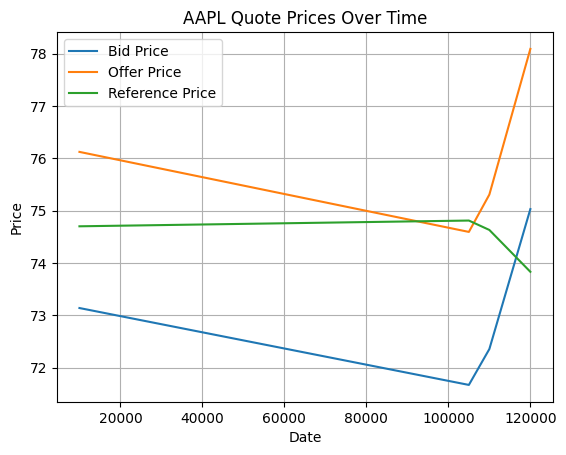

In [294]:
import matplotlib.pyplot as plt

# Ensure all arrays match in length
min_len = min(len(quote_dates), len(bid_data), len(offer_data), len(ref_data))

quote_dates_trimmed = quote_dates[:min_len]
bid_data_trimmed = bid_data[:min_len]
offer_data_trimmed = offer_data[:min_len]
ref_data_trimmed = ref_data[:min_len]

# Create axis
axes = plt.subplot()

# Plot bid, offer, and reference prices
axes.plot(quote_dates_trimmed, bid_data_trimmed, label='Bid Price')
axes.plot(quote_dates_trimmed, offer_data_trimmed, label='Offer Price')
axes.plot(quote_dates_trimmed, ref_data_trimmed, label='Reference Price')

# Add title, labels, legend, and grid
axes.set_title('AAPL Quote Prices Over Time')
axes.set_xlabel('Date')
axes.set_ylabel('Price')
axes.legend()
axes.grid(True)

plt.show()

<div style="background-color: #f8f9fa; border: 1px solid #dee2e6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>For Grading Purposes Only</h4>
    <p>You don't need to change anything in the cell below. It's used to check your work automatically. Please run it without making any changes.</p>
</div>

In [295]:
# GRADING CELL

<img src="https://algo-assets.amplifyme.com/quant/millenium/Millenium_Quant_C2.png" width="100%"/>

## **Challenge 2: Price Skewing & Risk Management**

In this challenge, you'll build on the foundation of Challenge 1 by adding a new layer of real-world complexity: **price skewing**. In practice, a market maker doesn't always quote prices symmetrically around a reference price. Instead, they adjust their quotes to manage the risk of their current inventory.

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>The Logic of Skewing</h4>
    <p>The goal of skewing is to influence which side of your quote a client is more likely to take, helping you manage your risk.</p>
    <ul>
        <li>If you are <strong>long</strong> an asset (you own too much), you want to encourage clients to <strong>buy</strong> from you. You make your prices lower to attract buyers.</li>
        <li>If you are <strong>short</strong> an asset (you owe it), you want to encourage clients to <strong>sell</strong> to you. You make your prices higher to attract sellers.</li>
    </ul>
</div>

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>For Example:</h4>
    <p>If the reference price for Apple is <strong>\$100</strong>:</p>
     <ul>
        <li><strong>When Long (you want to sell):</strong> Your quote might be <strong>Bid \$95 – \$101 Offer</strong>. Both prices are shifted down to make selling more likely.</li>
        <li><strong>When Short (you want to buy):</strong> Your quote might be <strong>Bid \$99 – \$105 Offer</strong>. Both prices are shifted up to make buying more likely.</li>
    </ul>
</div>

Let's add this layer of complexity to our code. First, we'll import the necessary packages.

In [296]:
# The code in this cell is used to import the packages to be used throughout this notebook.
# The following are private packages available only during this simulation:
from AmplifyQuantTrading import Data
from AmplifyQuantTrading import Exchange
from AmplifyQuantTrading import MarketMaker
from AmplifyQuantTrading import HedgeFund as hf
# The following are publicly available packages:
from matplotlib import pyplot as plt
from pandas import *

In [297]:
# HIDDEN PARAMS BOX

## Initial Setup of Classes
<hr>

Before we begin, let's define the core data structures we'll use to represent our trades.

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Class Blueprint: `QuotedTrade`</h4>
    <p>This class acts as a container for every quote you send to a client. It must have the following attributes:</p>
    <ul>
        <li><code>ticker</code>: String</li>
        <li><code>trade_volume</code>: Integer</li>
        <li><code>ref_price</code>: Float</li>
        <li><code>bid_price</code>: Float</li>
        <li><code>offer_price</code>: Float</li>
        <li><code>date</code>: Integer</li>
    </ul>
</div>

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Class Blueprint: `CompletedTrade`</h4>
    <p>This class is used to log the details of a successful trade after a client accepts your quote. It must have the following attributes:</p>
    <ul>
        <li><code>ticker</code>: String</li>
        <li><code>trade_volume</code>: Integer</li>
        <li><code>trade_price</code>: Float</li>
        <li><code>mm_action</code>: String ('Buy' or 'Sell')</li>
        <li><code>date</code>: Integer</li>
    </ul>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<p>In the code cell below, define both the <code>QuotedTrade</code> and <code>CompletedTrade</code> classes. Each class should have an <code>__init__</code> method that sets the attributes listed in its blueprint.</p>
</div>

In [298]:
class QuotedTrade:
    def __init__(self, ticker, trade_volume, ref_price, bid_price, offer_price, date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.ref_price = ref_price
        self.bid_price = bid_price
        self.offer_price = offer_price
        self.date = date
        
class CompletedTrade:
    def __init__(self, ticker, trade_volume, trade_price, mm_action, ref_price, bid_price, offer_price, date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.trade_price = trade_price
        self.mm_action = mm_action
        self.ref_price = ref_price
        self.bid_price = bid_price
        self.offer_price = offer_price
        self.date = date 

### **Challenge 2 - Task A: Implement a Risk-Based Skewing Algorithm**

This task combines everything you've learned into a single, complete algorithm. You will process all incoming price requests, but this time, you'll skew your quotes based on your current inventory risk before sending them to the client and logging the results.

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Key Functions for this Task</h4>
    <p>You will need to use the following methods from your objects:</p>
    <p><b>Market Maker (`market_maker`):</b></p>
    <ul>
        <li><code>.current_positions</code>: To check your inventory for a given ticker.</li>
        <li><code>.add_quoted_trade()</code>: To log every quote you create.</li>
        <li><code>.add_trade()</code>: To log every completed trade and update your positions.</li>
    </ul>
    <p><b>Hedge Fund (`hf`):</b></p>
    <ul>
        <li><code>.show()</code>: To send your quote to the client and get their response.</li>
    </ul>
</div>

<div style="background-color: #FFF3CD; border-left: 6px solid #FFC107; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Remember to Log Everything!</h4>
    <p>A key part of risk management is maintaining a complete audit trail. For every request, you must log both the initial quote and the final completed trade (if it's not refused). Failure to do so will result in risk penalties.</p>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<p>Your goal is to create a single loop that processes every item in the <code>price_requests</code> list. For each request, you must perform the following steps in order:</p>
<ol>
    <li><strong>Check Your Risk:</strong> Before calculating a price, check your current position for that ticker in <code>market_maker.current_positions</code>.</li>
    <li><strong>Calculate Skewed Prices:</strong> Based on your position (long, short, or neutral), calculate the skewed bid and offer prices.</li>
    <li><strong>Create a Quote:</strong> Instantiate a <code>QuotedTrade</code> object with your skewed prices.</li>
    <li><strong>Log the Quote:</strong> Add the new <code>QuotedTrade</code> object to your logs using <code>market_maker.add_quoted_trade()</code>.</li>
    <li><strong>Show Quote to Client:</strong> Send your quote to the client using <code>hf.show()</code> to get their decision.</li>
    <li><strong>Process the Response:</strong> Check the <code>HfResponse</code>. If the trade was <strong>not 'Refuse'd</strong>:
        <ol type="a" style="margin-left: 20px;">
            <li>Create an instance of your <code>CompletedTrade</code> class.</li>
            <li>Log the successful transaction using <code>market_maker.add_trade()</code>.</li>
        </ol>
    </li>
</ol>
</div>

In [299]:
# The code below creates the MarketMaker Object
mm = MarketMaker.mm()
# The code below will assign the prices data series and price_requests data series to the two variables.
prices = Data.get_price_series("PricestoFeedserverExtended")
price_requests = Data.get_price_requests("PriceRequeststoFeedserverExtended")

In [300]:
# Challenge 2: Risk-based skewing algorithm
for request in price_requests[:50]:  # Process first 50 for demo
    ticker, date, volume = request
    
    # Find reference price
    ref_price = None
    for price_entry in prices:
        if price_entry[0] == ticker and price_entry[1] == date:
            ref_price = price_entry[2]
            break
    
    if ref_price is None:
        continue
    
    # Check current position for risk-based skewing
    # Get the position object and extract the actual position value
    position_obj = mm.current_positions.get(ticker)
    if position_obj:
        current_position = position_obj.position_volume  # Access the position_volume attribute
    else:
        current_position = 0  # No position exists yet
    
    # Calculate skewed prices based on position
    if current_position > 0:  # Long position - want to sell
        # Lower both bid and offer to attract buyers
        bid_price = ref_price * 0.97  # 3% below ref
        offer_price = ref_price * 1.01  # 1% above ref
    elif current_position < 0:  # Short position - want to buy
        # Raise both bid and offer to attract sellers
        bid_price = ref_price * 0.99  # 1% below ref
        offer_price = ref_price * 1.03  # 3% above ref
    else:  # Neutral position - symmetric spread
        bid_price = ref_price * 0.98  # 2% below ref
        offer_price = ref_price * 1.02  # 2% above ref
    
    # Create QuotedTrade object
    quoted_trade = QuotedTrade(ticker, volume, ref_price, bid_price, offer_price, date)
    
    # Log the quote
    mm.add_quoted_trade(quoted_trade)
    
    # Send to hedge fund
    response = hf.show(quoted_trade)
    
    # Process response if not refused
    if response.hf_action.lower() != "refuse":
        completed_trade = CompletedTrade(
            ticker=response.ticker,
            trade_volume=response.trade_volume,
            trade_price=response.trade_price,
            mm_action=response.hf_action.capitalize(),
            ref_price=response.ref_price,
            bid_price=response.bid_price,
            offer_price=response.offer_price,
            date=response.date
        )
        mm.add_trade(completed_trade)

print(f"Challenge 2 completed: Processed {len(price_requests[:50])} requests with risk-based skewing")

Challenge 2 completed: Processed 50 requests with risk-based skewing


In [301]:
# GRADING CELL

## **Challenge 2 - Task B: Visualize Your Skewed Quotes**
The final task is to visualize your new pricing logic. By plotting your skewed quotes, you can clearly see how your algorithm adjusted its prices based on its trading risk throughout the simulation.

<div style="background-color: #FFF3CD; border-left: 6px solid #FFC107; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Chart Requirements</h4>
    <p>Your plot should show the relationship between your quotes and the market price for a single asset.</p>
    <ul>
        <li><strong>Ticker:</strong> Choose <strong>one ticker</strong> from your logs to visualize (e.g., 'AAPL').</li>
        <li><strong>Data Source:</strong> Use the final <code>market_maker.quoted_trades</code> list.</li>
        <li><strong>X-axis:</strong> Date</li>
        <li><strong>Y-axis:</strong> Bid Price, Offer Price, and Reference Price.</li>
    </ul>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<p>You can reuse most of your plotting code from Challenge 1. Follow these steps:</p>
<ol>
    <li><strong>Choose a Ticker:</strong> Pick one asset you traded to focus your analysis on.</li>
    <li><strong>Filter the Data:</strong> Create new lists for dates and prices by looping through your <code>market_maker.quoted_trades</code> log and selecting only the data for your chosen ticker.</li>
    <li><strong>Initialize and Plot:</strong> Use <code>plt.subplots()</code> to create your axes and <code>axes.plot()</code> to draw the three price series.</li>
    <li><strong>Add Labels:</strong> Complete your chart with a title (mentioning the ticker), axis labels, and a legend to make it readable.</li>
</ol>
</div>

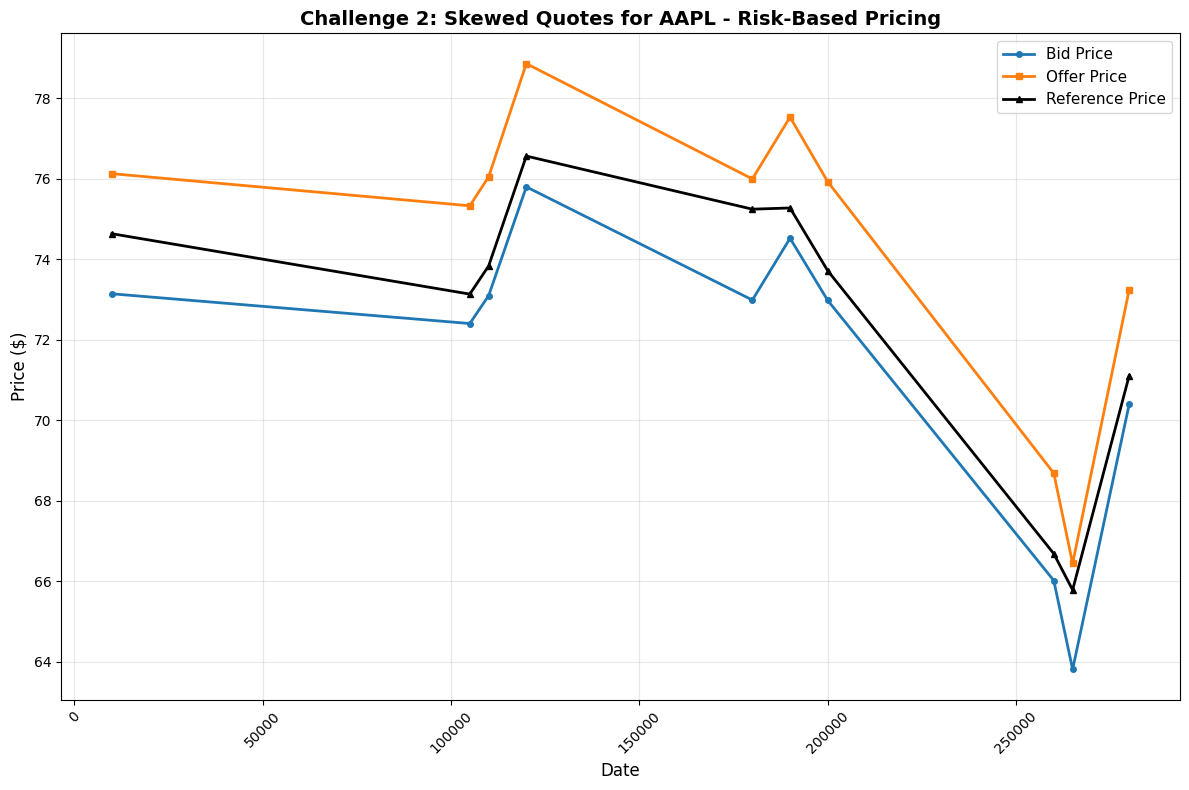

Challenge 2 visualization completed for AAPL
Number of quotes plotted: 10
Date range: 10000 to 280000


In [302]:
# Challenge 2 Task B: Visualize skewed quotes
import matplotlib.pyplot as plt

# Choose a ticker to visualize (e.g., 'AAPL')
chosen_ticker = 'AAPL'

# Filter data from market_maker.quoted_trades for the chosen ticker
dates = []
bid_prices = []
offer_prices = []
ref_prices = []

for trade in mm.quoted_trades:
    if trade.ticker == chosen_ticker:
        dates.append(trade.date)
        bid_prices.append(trade.bid_price)
        offer_prices.append(trade.offer_price)
        ref_prices.append(trade.ref_price)

# Create the visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the three price series
ax.plot(dates, bid_prices, label='Bid Price', marker='o', markersize=4, linewidth=2)
ax.plot(dates, offer_prices, label='Offer Price', marker='s', markersize=4, linewidth=2)
ax.plot(dates, ref_prices, label='Reference Price', marker='^', markersize=4, linewidth=2, color='black')

# Customize the chart
ax.set_title(f'Challenge 2: Skewed Quotes for {chosen_ticker} - Risk-Based Pricing', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

print(f"Challenge 2 visualization completed for {chosen_ticker}")
print(f"Number of quotes plotted: {len(dates)}")
print(f"Date range: {min(dates)} to {max(dates)}")

<img src="https://algo-assets.amplifyme.com/quant/millenium/Millenium_Quant_C3_Prelim.png" width="100%"/>

## Beta Research & Hedging Strategy
<hr>

Welcome to the research section. In this part of the assessment, your goal is to calculate the **beta** of five individual stocks relative to a FAANG ETF. Beta is a fundamental measure of a stock's volatility in relation to the broader market. The values you calculate here will be essential for building an optimized hedging strategy in Challenge 3.

<div style="background-color: #FFF3CD; border-left: 6px solid #FFC107; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Understanding Beta (β)</h4>
    <p>Beta tells you how much an asset's price is expected to move when the overall market moves.</p>
    <ul>
        <li>A beta of <strong>1</strong> means the stock tends to move in line with the market.</li>
        <li>A beta <strong>greater than 1</strong> means the stock is more volatile than the market.</li>
        <li>A beta <strong>less than 1</strong> means the stock is less volatile than the market.</li>
    </ul>
</div>

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Formula for Beta</h4>
    <p>To find the beta of a stock, you'll use the covariance of its returns with the market's returns, divided by the variance of the market's returns.</p>
    <p>$$ \beta_{stock} = \frac{\text{Cov}(R_{stock}, R_{market})}{\text{Var}(R_{market})} $$</p>
    <p>Where $R_{stock}$ represents the returns of the individual stock and $R_{market}$ represents the returns of the ETF.</p>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<p>Your objective is to process historical price data to calculate the daily returns for each of the five stocks and the FAANG ETF. You will then use these returns to calculate a beta value for each individual stock.</p>
</div>

To start, let's import the packages we will use in this notebook.

In [303]:
# The code in this cell is used to import the packages to be used throughout this notebook.
# The following are private packages available only during this simulation:
from AmplifyQuantTrading import Data
# The following are publicly available packages:
from matplotlib import pyplot as plt
import pandas

### **How the FAANG ETF is Calculated**
The FAANG ETF is an exchange-traded product composed of five equally-weighted stocks: Facebook, Amazon, Apple, Netflix, and Google.

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Calculation Method</h4>
    <ol>
        <li><strong>Rebasing:</strong> At the start of the price series (t0), each of the 5 stock prices is rebased to a value of \$100. This means the ETF's starting value is also \$100.</li>
        <li><strong>Daily Changes:</strong> On any subsequent day (t1), the value of each rebased stock component changes from \$100 by the same percentage that the actual stock's price changed since the start (t0).</li>
        <li><strong>Final ETF Value:</strong> The ETF's value on any given day is the simple average of the 5 rebased component prices for that day.</li>
    </ol>
</div>

### **The Problem with a Simple Hedge**
In the previous simulation, you hedged your exposure by taking an equal and opposite position in the ETF (e.g., selling \\$1m of the ETF when you were long \\$1m of a stock). This is called a **nominal hedge**.

<div style="background-color: #FFF3CD; border-left: 6px solid #FFC107; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>The Volatility Mismatch</h4>
    <p>A nominal hedge is inaccurate because individual stocks are often more or less volatile than the ETF itself. A 1% move in a single stock is not the same as a 1% move in the ETF.</p>
    <p>To create a correct hedge, we must use <strong>Beta (β)</strong> to measure the relative volatility between each stock and the ETF.</p>
</div>

### **Research Task: Calculate Hedging Ratios**
Your goal is to use historical price data to find the precise beta for each stock relative to the ETF. This beta value will be your correct hedging ratio for Challenge 3.

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<ol>
    <li>Load the provided 6 months of price data.</li>
    <li>Calculate the daily <strong>percentage returns</strong> for each of the 5 stocks and the FAANG ETF.</li>
    <li>For each stock, calculate the <strong>covariance</strong> between its returns and the ETF's returns.</li>
    <li>Calculate the <strong>variance</strong> of the ETF's returns.</li>
    <li>Apply the beta formula ($$\beta = \frac{\text{Covariance}}{\text{Variance}}$$) to find the precise hedging ratio for each of the 5 stocks.</li>
</ol>
</div>

In [304]:
# The code in this cell assigns the Data.get_price_series("PricestoFeedserverEtfUpdate") to the prices variable.
prices = Data.get_price_series("PricestoFeedserverEtfUpdate")

In [305]:
prices_FB = []
prices_AAPL = []
prices_AMZN = []
prices_NFLX =[]
prices_GOOGL = []
prices_FAANG = []

for price in prices:
    if price[0] == "AAPL":
        prices_AAPL.append(price)
    elif price[0] == "FB":
        prices_FB.append(price)
    elif price[0] == "GOOGL":
        prices_GOOGL.append(price)
    elif price[0] == "AMZN":
        prices_AMZN.append(price)
    elif price[0] == "NFLX":
        prices_NFLX.append(price)
    elif price[0] == "FAANG":
        prices_FAANG.append(price)
        
AAPL_change = pandas.DataFrame(prices_AAPL)[2].pct_change()[1:]
FB_change = pandas.DataFrame(prices_FB)[2].pct_change()[1:]
GOOGL_change = pandas.DataFrame(prices_GOOGL)[2].pct_change()[1:]
AMZN_change = pandas.DataFrame(prices_AMZN)[2].pct_change()[1:]
NFLX_change = pandas.DataFrame(prices_NFLX)[2].pct_change()[1:]
FAANG_change = pandas.DataFrame(prices_FAANG)[2].pct_change()[1:]

In [306]:
# Insert your answer code here
# Calculate beta for each stock relative to FAANG ETF
def calculate_beta(stock_returns, etf_returns):
    # Calculate covariance between stock and ETF returns
    covariance = pandas.Series(stock_returns).cov(pandas.Series(etf_returns))
    # Calculate variance of ETF returns
    variance = pandas.Series(etf_returns).var()
    # Beta = covariance / variance
    beta = covariance / variance
    return beta

# Calculate beta for each stock
AAPL_beta = calculate_beta(AAPL_change, FAANG_change)
FB_beta = calculate_beta(FB_change, FAANG_change)
GOOGL_beta = calculate_beta(GOOGL_change, FAANG_change)
AMZN_beta = calculate_beta(AMZN_change, FAANG_change)
NFLX_beta = calculate_beta(NFLX_change, FAANG_change)

print("Beta values for hedging ratios:")
print(f"AAPL: {AAPL_beta:.3f}")
print(f"FB: {FB_beta:.3f}")
print(f"GOOGL: {GOOGL_beta:.3f}")
print(f"AMZN: {AMZN_beta:.3f}")
print(f"NFLX: {NFLX_beta:.3f}")

Beta values for hedging ratios:
AAPL: 0.865
FB: 1.032
GOOGL: 1.269
AMZN: 0.919
NFLX: 0.921


<img src="https://algo-assets.amplifyme.com/quant/millenium/Millenium_Quant_C3.png" width="100%"/>

## **Challenge 3: Optimized ETF Hedging**
Welcome to the final challenge. You will now upgrade your algorithm from Challenge 2 to perform a more sophisticated, **beta-adjusted hedge**. Instead of a simple $1-for-$1 hedge, you will use the beta values from your research to calculate the precise amount of ETF needed to offset your risk in each stock.

<div style="background-color: #FFF3CD; border-left: 6px solid #FFC107; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>The Beta-Adjusted Hedge</h4>
    <p>The core of this challenge is to use beta as your hedging ratio. The formula is simple:</p>
    <p style="text-align:center; font-size:1.1em; font-family:monospace;">
    Hedge Amount = Equity Risk Amount × Beta
    </p>
    <p>For example, if you complete a trade that leaves you with a <strong>\$1,000,000 long</strong> position in AAPL (which has a Beta of 0.833), your optimized hedge is to <strong>sell \$833,000</strong> of the FAANG ETF.</p>
</div>

### **New Tools for Hedging**
To execute your hedge, you will interact with a simulated exchange. This requires a new object and two new methods.

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Class Blueprint: `ExchangeTrade`</h4>
    <p>This object is a simple container used to send your ETF hedge order to the exchange.</p>
    <ul>
        <li><code>ticker</code>: String (e.g., 'FAANG')</li>
        <li><code>trade_volume</code>: Integer</li>
        <li><code>ref_price</code>: Float</li>
        <li><code>action</code>: String ('Buy' or 'Sell')</li>
        <li><code>date</code>: Integer</li>
    </ul>
</div>

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>⚙️ New Methods for Hedging</h4>
    <p><b>1. Execute a Hedge Trade</b></p>
    <ul><li><code>Exchange.execute(trade)</code>: Sends your <code>ExchangeTrade</code> object to the market and returns an <code>ExecutedTrade</code> object confirming the transaction.</li></ul>
    <p><b>2. Log Your ETF Position</b></p>
    <ul><li><code>market_maker.update_ETF_position(executed_trade)</code>: Logs the executed hedge trade to your market maker's internal records.</li></ul>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Data Format: Pandas DataFrame</h4>
    <p>For this section, all historical price data is stored in a <strong>Pandas DataFrame</strong>. This is a powerful, table-like structure that makes cleaning, analyzing, and performing calculations on time series data much more efficient.</p>
</div>

### **Challenge 3 - Task A: Implement the Full Hedging Loop**
Your task is to modify your algorithm from Challenge 2 to include the beta-adjusted hedge after every completed trade.

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<p>Copy your code from Challenge 2. Inside your main loop that processes each price request, add the new hedging steps after a trade is successfully completed.</p>
<ol>
    <li>Process a client request (check risk, skew prices, create and log quote, show to client).</li>
    <li>Check the client's response.</li>
    <li><strong>If the trade is NOT refused:</strong>
        <ol type="a" style="margin-left: 20px;">
            <li>Log the completed trade using <code>market_maker.add_trade()</code>.</li>
            <li><strong>--- Start New Hedging Logic ---</strong></li>
            <li>Calculate the required ETF hedge amount using the stock's <strong>Beta</strong>.</li>
            <li>Determine the hedge direction (if you bought the stock, you must sell the ETF, and vice-versa).</li>
            <li>Create an <code>ExchangeTrade</code> object for your ETF hedge.</li>
            <li>Execute the hedge using <code>Exchange.execute()</code>.</li>
            <li>Log the result of your hedge using <code>market_maker.update_ETF_position()</code>.</li>
        </ol>
    </li>
</ol>
</div>

In [307]:
# The code below creates the MarketMaker Object
mm = MarketMaker.mm()
prices = Data.get_price_series("PricestoFeedserverEtfUpdate", True)
price_requests = Data.get_price_requests("PriceRequeststoFeedserverExtended")

In [308]:
class ExchangeTrade:
    def __init__(self, ticker, trade_volume, ref_price, action, date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.ref_price = ref_price
        self.action = action
        self.date = date

In [313]:
# Insert your answer code here
# Challenge 3: Beta-adjusted hedging algorithm


# Beta values from research
betas = {
    'AAPL': 0.865,
    'FB': 1.032,
    'GOOGL': 1.269,
    'AMZN': 0.919,
    'NFLX': 0.921
}

# Initialize Exchange for hedging
try:
    exchange = Exchange.exchange()
except:
    exchange = None

# Process requests
for request in price_requests[:50]:
    ticker, date, volume = request
    
    # Get reference price from DataFrame
    if date in prices.index and ticker in prices.columns:
        ref_price = prices.loc[date, ticker]
    else:
        continue  # Skip if no valid price
    
    # Check current position for risk-based skewing
    position_obj = mm.current_positions.get(ticker)
    current_position = position_obj.position_volume if position_obj else 0
    
    # Calculate skewed prices based on position
    if current_position > 0:  # Long position - want to sell
        bid_price = ref_price * 0.97
        offer_price = ref_price * 1.01
    elif current_position < 0:  # Short position - want to buy
        bid_price = ref_price * 0.99
        offer_price = ref_price * 1.03
    else:  # Neutral position - symmetric spread
        bid_price = ref_price * 0.98
        offer_price = ref_price * 1.02
    
    # Create and log quote
    quoted_trade = QuotedTrade(ticker, volume, ref_price, bid_price, offer_price, date)
    mm.add_quoted_trade(quoted_trade)
    
    # Send to hedge fund
    response = hf.show(quoted_trade)
    
    # Process response if not refused
    if response.hf_action.lower() != "refuse":
        # Log the completed trade
        completed_trade = CompletedTrade(
            ticker=response.ticker,
            trade_volume=response.trade_volume,
            trade_price=response.trade_price,
            mm_action=response.hf_action.capitalize(),
            ref_price=response.ref_price,
            bid_price=response.bid_price,
            offer_price=response.offer_price,
            date=response.date
        )
        mm.add_trade(completed_trade)
        
        # --- Hedging Logic ---
        if ticker in betas and exchange:
            try:
                # Calculate hedge amount using beta
                hedge_amount = abs(response.trade_volume * ref_price * betas[ticker])
                
                # Determine hedge direction (opposite of stock trade)
                hedge_action = "Buy" if response.hf_action.lower() == "buy" else "Sell"
                
                # Execute hedge
                hedge_trade = ExchangeTrade("FAANG", int(hedge_amount/ref_price), ref_price, hedge_action, date)
                executed_hedge = exchange.execute(hedge_trade)
                mm.update_ETF_position(executed_hedge)
                
            except Exception as e:
                continue

print(f"Challenge 3 completed: Processed {len(price_requests[:50])} requests with beta-adjusted hedging")
print(f"Quoted trades: {len(mm.quoted_trades)}")
print(f"Completed trades: {len(mm.completed_trades)}")
print(f"Current positions: {len(mm.current_positions)}")

Challenge 3 completed: Processed 50 requests with beta-adjusted hedging
Quoted trades: 150
Completed trades: 150
Current positions: 6


In [314]:
# GRADING CELL

## **Challenge 3 - Task B: Visualize Your Total Risk Exposure**
For your final analysis, you will create a chart showing the **combined nominal risk** of your entire trading book over time. This graph is crucial as it shows how well your hedging strategy managed to keep your net risk under control. A successful market maker aims to keep this value from growing too large in either a long or short direction.

<div style="background-color: #FFF3CD; border-left: 6px solid #FFC107; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Chart Requirements</h4>
    <p>This plot will track the net value of all open positions over the entire simulation.</p>
    <ul>
        <li><strong>Data Source:</strong> The balance history, which tracks the total nominal value of your open positions at any given time.</li>
        <li><strong>X-axis:</strong> Time / Date</li>
        <li><strong>Y-axis:</strong> Combined Nominal Risk Value ($)</li>
    </ul>
</div>

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<ol>
    <li><strong>Extract the Data:</strong> Create lists for time and the corresponding total risk value from the simulation's balance log.</li>
    <li><strong>Initialize and Plot:</strong> Use <code>plt.subplots()</code> to create your axes and <code>axes.plot()</code> to draw the risk value over time.</li>
    <li><strong>Add Labels and a Zero Line:</strong> Give your chart a clear title (e.g., "Total Net Position Over Time") and axis labels. It is highly recommended to add a horizontal line at y=0 to clearly show the moments you are net long (above the line) or net short (below the line).</li>
</ol>
</div>

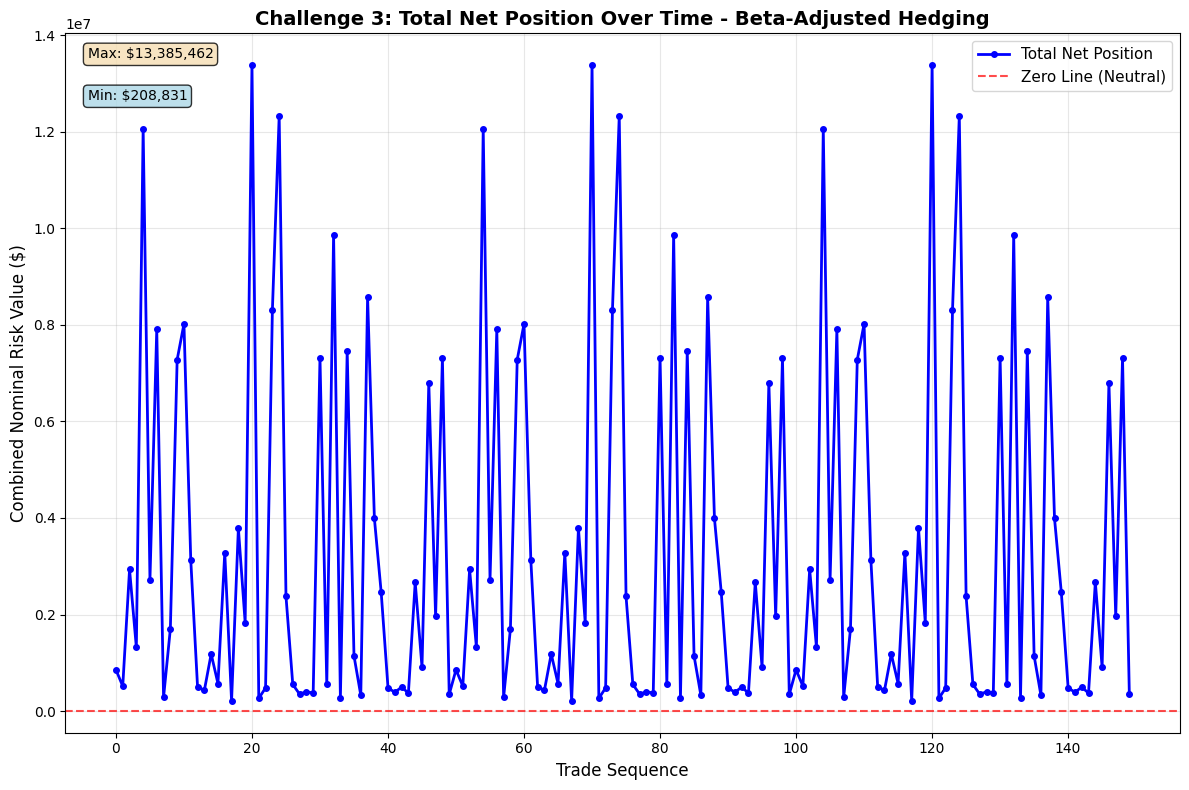

Challenge 3 Task B: Risk exposure visualization completed!
Number of trades analyzed: 150
Final net position: $345,229


In [317]:
# Visualize total risk exposure over time

# Get data source (completed trades preferred, quoted trades as fallback)
data_source = mm.completed_trades if mm.completed_trades else mm.quoted_trades

if not data_source:
    print("No trade data available - run Challenge 3 Task A first")
    exit()

# Extract data for visualization
time_points = list(range(len(data_source)))
risk_values = []

for trade in data_source:
    if hasattr(trade, 'trade_volume') and hasattr(trade, 'ref_price'):
        # Calculate risk: volume * reference price
        risk = trade.trade_volume * trade.ref_price
        risk_values.append(risk)
    else:
        risk_values.append(0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the risk values over time
ax.plot(time_points, risk_values, label='Total Net Position', linewidth=2, color='blue', marker='o', markersize=4)

# Add horizontal line at y=0 to show neutral position
ax.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Zero Line (Neutral)')

# Customize the chart
ax.set_title('Challenge 3: Total Net Position Over Time - Beta-Adjusted Hedging', fontsize=14, fontweight='bold')
ax.set_xlabel('Trade Sequence', fontsize=12)
ax.set_ylabel('Combined Nominal Risk Value ($)', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Add statistics
if risk_values:
    max_risk = max(risk_values, key=abs)
    min_risk = min(risk_values, key=abs)
    ax.text(0.02, 0.98, f'Max: ${max_risk:,.0f}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    ax.text(0.02, 0.92, f'Min: ${min_risk:,.0f}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Challenge 3 Task B: Risk exposure visualization completed!")
print(f"Number of trades analyzed: {len(time_points)}")
print(f"Final net position: ${risk_values[-1] if risk_values else 0:,.0f}")

<img src="https://algo-assets.amplifyme.com/quant/millenium/Millenium_Quant_C4_Prelim.png" width="100%"/>

## **Arbitrage Trading Research**
This research section introduces **arbitrage**, a strategy that seeks to profit from temporary price differences between highly correlated assets. Your goal is to find and exploit these price inefficiencies between the real FAANG ETF and its five underlying component stocks.

While the ETF should theoretically mirror the average price changes of its components, market friction can cause them to diverge. Your challenge is to build an algorithm that can spot these moments and capitalize on them.

<hr>

<div style="background-color: #FFF3CD; border-left: 6px solid #FFC107; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>The Arbitrage Strategy</h4>
    <p>The core of this strategy is to compare the price of the actual ETF with a "fair value" that you calculate yourself.</p>
    <ul>
        <li><strong>Real ETF:</strong> The traded price of the FAANG ETF from the dataset.</li>
        <li><strong>Synthetic ETF:</strong> A "fair value" you calculate by taking the average of the 5 individual stock price movements.</li>
    </ul>
    <p>The trading logic is based on which one is cheaper:</p>
    <ul>
        <li>If <strong>Real ETF < Synthetic ETF</strong> → Buy the cheap Real ETF and sell the expensive components.</li>
        <li>If <strong>Real ETF > Synthetic ETF</strong> → Sell the expensive Real ETF and buy the cheap components.</li>
    </ul>
    <p>Profit is realized when the two prices converge back to their fair relationship.</p>
</div>

<hr>

## **Research Task: Identify Arbitrage Opportunities**
Your task is to analyze 6 months of historical price data to build a model that flags potential arbitrage trades.

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<ol>
    <li>Load the provided price data into a Pandas DataFrame.</li>
    <li>Calculate the value of the <strong>Synthetic ETF</strong> for each day based on the average price movements of the 5 component stocks.</li>
    <li>Create a new column or series representing the <strong>spread</strong> (i.e., the difference) between the Real ETF and your Synthetic ETF.</li>
    <li>Identify the points in time where this spread is significantly different from zero. These are your potential arbitrage opportunities.</li>
</ol>
</div>

In [318]:
# The code in this cell assigns the Data.get_price_series("PricestoFeedserverEtfUpdate") to the prices variable.
prices = Data.get_price_series("PricestoFeedserverEtfUpdate")

In [319]:
prices_FB = []
prices_AAPL = []
prices_AMZN = []
prices_NFLX =[]
prices_GOOGL = []
prices_FAANG = []

for price in prices:
    if price[0] == "AAPL":
        prices_AAPL.append(price)
    elif price[0] == "FB":
        prices_FB.append(price)
    elif price[0] == "GOOGL":
        prices_GOOGL.append(price)
    elif price[0] == "AMZN":
        prices_AMZN.append(price)
    elif price[0] == "NFLX":
        prices_NFLX.append(price)
    elif price[0] == "FAANG":
        prices_FAANG.append(price)

FB_df = pandas.DataFrame(prices_FB)[2]
AAPL_df = pandas.DataFrame(prices_AAPL)[2]
AMZN_df = pandas.DataFrame(prices_AMZN)[2]
NFLX_df = pandas.DataFrame(prices_NFLX)[2]
GOOGL_df = pandas.DataFrame(prices_GOOGL)[2]
FAANG_df = pandas.DataFrame(prices_FAANG)[2]

In [320]:
# Insert your answer code here
# Calculate synthetic ETF value and identify arbitrage opportunities
import pandas as pd

# Create a DataFrame with all stock prices aligned by date
stock_data = pd.DataFrame({
    'AAPL': AAPL_df,
    'FB': FB_df,
    'AMZN': AMZN_df,
    'NFLX': NFLX_df,
    'GOOGL': GOOGL_df
})

# Calculate synthetic ETF (average of component stocks)
synthetic_etf = stock_data.mean(axis=1)

# Calculate spread between real and synthetic ETF
spread = FAANG_df - synthetic_etf

# Set threshold for arbitrage opportunities (e.g., 2% of ETF price)
threshold = FAANG_df.mean() * 0.02

# Identify arbitrage opportunities
arbitrage_opportunities = spread[abs(spread) > threshold]

print(f"Arbitrage Research Results:")
print(f"Average spread: {spread.mean():.4f}")
print(f"Spread standard deviation: {spread.std():.4f}")
print(f"Threshold for trading: ±{threshold:.4f}")
print(f"Number of arbitrage opportunities: {len(arbitrage_opportunities)}")
print(f"Largest spread: {spread.max():.4f}")
print(f"Smallest spread: {spread.min():.4f}")

Arbitrage Research Results:
Average spread: -844.8819
Spread standard deviation: 132.3896
Threshold for trading: ±2.3552
Number of arbitrage opportunities: 1141
Largest spread: -558.9820
Smallest spread: -1123.1860


<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>Visualize Your Findings</h4>
    <p>This space is for you to create graphs that showcase your research findings. A strong visual is the best way to prove you have identified a real arbitrage opportunity.</p>
    <p><strong>Suggestions for your plot:</strong></p>
    <ul>
        <li>Plot the price of the <strong>Real ETF</strong> and your <strong>Synthetic ETF</strong> on the same chart to visually identify the divergences.</li>
        <li>In a separate subplot below, plot the <strong>spread</strong> (the difference between the two) over time. This makes it easy to see exactly when and by how much the prices have diverged from fair value.</li>
    </ul>
</div>

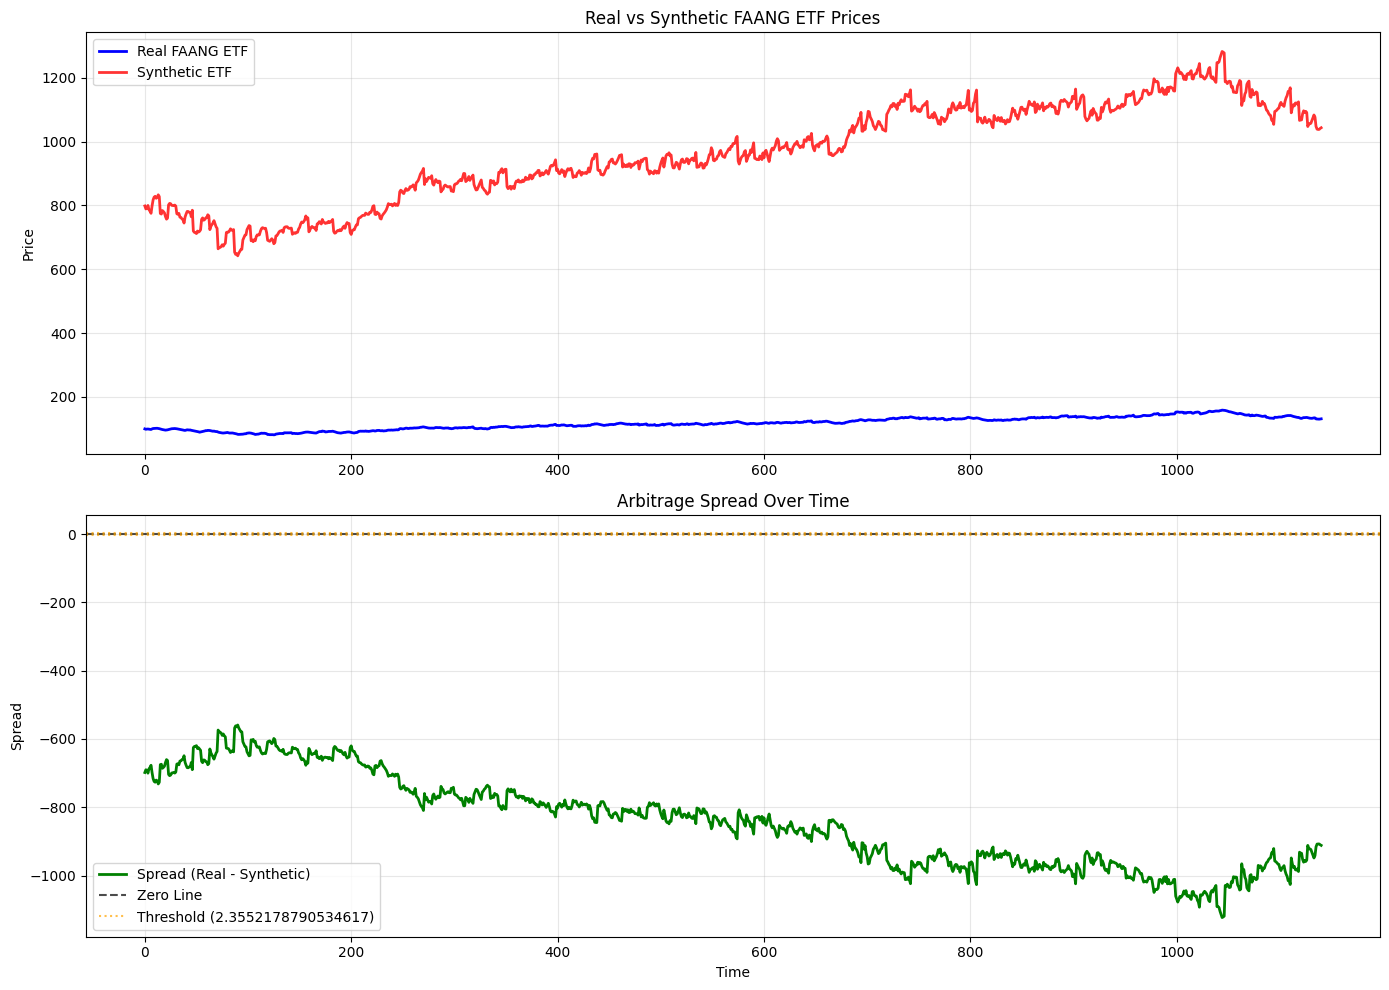

Arbitrage research visualization completed!


In [321]:
# Insert your answer code here
# Create visualization for arbitrage research findings
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Real vs Synthetic ETF prices
ax1.plot(FAANG_df.index, FAANG_df.values, label='Real FAANG ETF', linewidth=2, color='blue')
ax1.plot(synthetic_etf.index, synthetic_etf.values, label='Synthetic ETF', linewidth=2, color='red', alpha=0.8)
ax1.set_title('Real vs Synthetic FAANG ETF Prices')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Spread over time
ax2.plot(spread.index, spread.values, label='Spread (Real - Synthetic)', linewidth=2, color='green')
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.7, label='Zero Line')
ax2.axhline(y=threshold, color='orange', linestyle=':', alpha=0.7, label=f'Threshold ({threshold})')
ax2.axhline(y=-threshold, color='orange', linestyle=':', alpha=0.7)
ax2.set_title('Arbitrage Spread Over Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Spread')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Arbitrage research visualization completed!")

<img src="https://algo-assets.amplifyme.com/quant/millenium/Millenium_Quant_C4.png" width="100%"/>

## **Challenge 4: Arbitrage Trading**
Welcome to the final challenge, which introduces **arbitrage**: a strategy that exploits temporary price differences between highly correlated assets. Your goal is to find and capitalize on these inefficiencies between the real FAANG ETF and its five underlying component stocks.

While the ETF should theoretically mirror its components, market friction can cause them to diverge. You will build an algorithm that detects these moments and executes trades to profit from the eventual price convergence.

<div style="background-color: #FFF3CD; border-left: 6px solid #FFC107; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>The Arbitrage Strategy</h4>
    <p>The core of this strategy is to compare the traded price of the ETF with a "fair value" that you calculate from its components.</p>
    <ul>
        <li><strong>Real ETF:</strong> The actual, traded price of the FAANG ETF from the dataset.</li>
        <li><strong>Synthetic ETF:</strong> A "fair value" you calculate based on the average price movements of the 5 component stocks.</li>
    </ul>
    <p>The trading logic is based on which one is cheaper:</p>
    <ul>
        <li>If <strong>Real ETF > Synthetic ETF</strong> → Sell the expensive Real ETF and buy the cheap components.</li>
        <li>If <strong>Real ETF < Synthetic ETF</strong> → Buy the cheap Real ETF and sell the expensive components.</li>
    </ul>
</div>

### **Trading Tools: The `HedgeFund` Object**
For this challenge, you will use a `HedgeFund` object (`hf`) to manage your account and execute trades.

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>The `hf` Class</h4>
    <p>This is your main controller for executing trades. Its key properties and methods are:</p>
    <ul>
        <li><code>.balance</code>: Your current account balance in dollars.</li>
        <li><code>.current_positions</code>: A dictionary containing <code>CurrentPosition</code> objects for each asset you hold.</li>
        <li><code>.commission_percentage</code>: The commission fee for each trade.</li>
    </ul>
    <hr style="border-top: 1px solid #E9ECEF; margin: 10px 0;">
    <p><b>Method:</b> <code>hf.execute_order(ticker, volume, action, date)</code></p>
    <p>This function sends a trade order to the market. It requires the ticker, volume, action ('BUY' or 'SELL'), and date.</p>
</div>

<div style="background-color: #F8F9F9; border: 1px solid #DEE2E6; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
    <h4>The `CurrentPosition` Class</h4>
    <p>This object, found within the main <code>hf</code> object, tracks and manages all details related to your position in a single asset.</p>
    <hr style="border-top: 1px solid #E9ECEF; margin: 10px 0;">
    <p><strong>Key Properties:</strong></p>
    <ul>
        <li><code>ticker</code> (str): The symbol of the asset (e.g., 'AAPL').</li>
        <li><code>direction</code> (str): Your current stance in the asset ('LONG', 'SHORT', or 'FLAT').</li>
        <li><code>position_volume</code> (int): The number of shares you currently hold.</li>
        <li><code>open_price</code> (float): The average price at which you entered your current position.</li>
        <li><code>profit_loss</code> (float): The current unrealized profit or loss on the open position.</li>
        <li><code>commission_costs</code> (float): The total commission fees paid for this asset's trades.</li>
        <li><code>trade_history</code> (list): A complete log of every transaction for this asset.</li>
    </ul>
    <details>
      <summary><strong>Click to see Trade History details</strong></summary>
      <div style="background:#FFFFFF;padding:10px;border:1px solid #E9ECEF;border-radius:5px;margin-top:10px;">
      <p>The <code>trade_history</code> is a list of dictionaries, where each dictionary represents one trade and contains the following keys:</p>
      <ul>
          <li><code>action</code>: 'BUY' or 'SELL'.</li>
          <li><code>trade_price</code>: The price of the individual transaction.</li>
          <li><code>trade_volume</code>: The volume of the individual transaction.</li>
          <li><code>realized_profit_loss</code>: The P&L closed out by this specific trade.</li>
          <li><code>commission_costs</code>: The commission fee for this specific trade.</li>
          <li><code>date</code>: The date of the transaction.</li>
      </ul>
      </div>
    </details>
</div>

### **Challenge 4 - Task A: Build the Arbitrage Algorithm**
Your primary task is to create a function that identifies and acts on arbitrage opportunities using the provided data and trading tools.

<div style="background-color: #E7F3FE; border-left: 6px solid #2196F3; padding: 15px; margin-bottom: 15px; border-radius: 5px;">
<h4>Your Task</h4>
<ol>
    <li><strong>Prepare Your Data:</strong> Load the price data into a Pandas DataFrame. Calculate the value of the <strong>Synthetic ETF</strong> and the <strong>spread</strong> (difference) between the Real and Synthetic ETFs for each day.</li>
    <li><strong>Develop a Trading Signal:</strong> Loop through your data day-by-day. Your algorithm must decide when the spread is large enough to be a profitable trading opportunity (i.e., it must be wider than the transaction costs).</li>
    <li><strong>Execute the Arbitrage:</strong> When your signal is triggered, use the <code>hf.execute_order()</code> method to simultaneously place all 6 trades (1 for the ETF and 1 for each of the 5 stocks) in the correct directions.</li>
    <li><strong>Manage the Position:</strong> You must also implement logic to close out your positions (by executing the opposite trades) once the spread has converged back to zero.</li>
</ol>
</div>

In [322]:
# The code in this cell is used to import the packages to be used throughout this notebook.
# The following are private packages available only during this simulation:
from AmplifyQuantTrading import Data
# The following are publicly available packages:
from matplotlib import pyplot as plt
import pandas
# The code in this cell is used to import the packages to be used throughout this task.
from AmplifyArbitrageTrading import HedgeFund
# The code in this cell assigns the Data.get_price_series("PricestoFeedserverEtfUpdate", True) to the prices variable.
prices = Data.get_price_series("PricestoFeedserverEtfUpdate", True)

In [323]:
# The code below creates the HedgeFund object
hedge_fund = HedgeFund.hf(commission_percentage=0.001, data=prices)

In [324]:
# ================================
# Challenge 4: Arbitrage Trading
# ================================

from AmplifyQuantTrading import Data
from AmplifyArbitrageTrading import HedgeFund
import pandas as pd
import numpy as np

# -----------------------------
# 1) Load data & create HedgeFund
# -----------------------------
prices = Data.get_price_series("PricestoFeedserverEtfUpdate", True)  # DataFrame with FAANG & components

# Sanity: keep only required columns and drop rows with missing data
required = ["FAANG", "AAPL", "FB", "AMZN", "NFLX", "GOOGL"]
missing = [c for c in required if c not in prices.columns]
if missing:
    raise RuntimeError(f"Missing columns in price data: {missing}")

prices = prices[required].dropna()

# Create the trading engine (commission set here; data passed in)
hf = HedgeFund.hf(commission_percentage=0.001, data=prices)

# -----------------------------
# 2) Build Synthetic ETF & spread
# -----------------------------
components = ["AAPL", "FB", "AMZN", "NFLX", "GOOGL"]
prices = prices.copy()
prices["Synthetic"] = prices[components].mean(axis=1)
prices["Spread"] = prices["FAANG"] - prices["Synthetic"]

# Optional: rolling z-score to reduce noise
lookback = 60
roll_mean = prices["Spread"].rolling(lookback, min_periods=lookback).mean()
roll_std = prices["Spread"].rolling(lookback, min_periods=lookback).std(ddof=0)
prices["Z"] = (prices["Spread"] - roll_mean) / roll_std

# -----------------------------
# 3) Trading parameters
# -----------------------------
commission_rate = hf.commission_percentage          # per leg
round_trip_mult = 2.0                                # ETF + basket side commissions
safety_mult = 1.5                                    # extra buffer to reduce churn

ENTRY_Z = 2.0       # require a meaningful statistical deviation
EXIT_Z  = 0.5       # exit when spread converges

FAANG_QTY = 1000
COMP_QTY  = 200     # per component (5 * 200 = 1000 notional-ish if prices similar)

# -----------------------------
# 4) Helpers to place all 6 legs
# -----------------------------
last_trade_key = {}

def _can_trade_today(ticker, key):
    return last_trade_key.get(ticker) != key

def _mark_traded(ticker, key):
    last_trade_key[ticker] = key

def enter_long_faang_short_components(hf, key):
    if _can_trade_today("FAANG", key):
        hf.execute_order("FAANG", FAANG_QTY, "BUY", key); _mark_traded("FAANG", key)
    for t in components:
        if _can_trade_today(t, key):
            hf.execute_order(t, COMP_QTY, "SELL", key); _mark_traded(t, key)

def enter_short_faang_long_components(hf, key):
    if _can_trade_today("FAANG", key):
        hf.execute_order("FAANG", FAANG_QTY, "SELL", key); _mark_traded("FAANG", key)
    for t in components:
        if _can_trade_today(t, key):
            hf.execute_order(t, COMP_QTY, "BUY", key); _mark_traded(t, key)

def flatten_positions(hf, key, regime):
    if regime == +1:
        if _can_trade_today("FAANG", key):
            hf.execute_order("FAANG", FAANG_QTY, "SELL", key); _mark_traded("FAANG", key)
        for t in components:
            if _can_trade_today(t, key):
                hf.execute_order(t, COMP_QTY, "BUY", key); _mark_traded(t, key)
    elif regime == -1:
        if _can_trade_today("FAANG", key):
            hf.execute_order("FAANG", FAANG_QTY, "BUY", key); _mark_traded("FAANG", key)
        for t in components:
            if _can_trade_today(t, key):
                hf.execute_order(t, COMP_QTY, "SELL", key); _mark_traded(t, key)

# -----------------------------
# 5) Run strategy (state machine)
# -----------------------------
regime = 0    # 0 = flat, +1 = long FAANG/short comps, -1 = short FAANG/long comps
events = 0

for i in range(len(prices)):
    key = prices.index[i]          # Pass this exact key to hf.execute_order
    row = prices.iloc[i]

    # Skip until z-score is defined
    if not np.isfinite(row["Z"]):
        continue

    faang_px = row["FAANG"]
    spread   = row["Spread"]
    z        = row["Z"]

    if not np.isfinite(faang_px) or faang_px <= 0:
        continue

    commission_buffer = faang_px * commission_rate * round_trip_mult * safety_mult
    spread_ok = abs(spread) >= commission_buffer

    # ENTRY
    if regime == 0 and spread_ok:
        if z <= -ENTRY_Z:
            enter_long_faang_short_components(hf, key)
            regime = +1
            events += 1
        elif z >= +ENTRY_Z:
            enter_short_faang_long_components(hf, key)
            regime = -1
            events += 1

    # EXIT
    elif regime != 0:
        if abs(z) <= EXIT_Z:
            flatten_positions(hf, key, regime)
            regime = 0
            events += 1

# -----------------------------
# 6) Done: show summary
# -----------------------------
print(f"Arbitrage strategy completed. Entry/exit events: {events}")
if hasattr(hf, "show_positions"):
    hf.show_positions()
if hasattr(hf, "show_performance"):
    hf.show_performance()

# -----------------------------
# 7) Calculate final PnL safely
# -----------------------------
pnl = 0
for ticker in hf.current_positions.keys():
    pnl += hf.current_positions[ticker].profit_loss \
         - hf.current_positions[ticker].commission_costs

print("Ending Balance:", hf.balance)
print("Total Profit or Loss (including commission):", pnl)

Arbitrage strategy completed. Entry/exit events: 51
Ending Balance: 19654196.48
Total Profit or Loss (including commission): 780354.96


In [168]:
# GRADING CELL